In [1]:
import sys,os

data_path = os.getcwd()

try:
    import localgraphclustering as lgc
except:
    # when the package is not installed, import the local version instead. 
    # the notebook must be placed in the original "notebooks/" folder
    sys.path.append("../")
    import localgraphclustering as lgc

In [2]:
import time
import numpy as np

import matplotlib.pyplot as plt

# Load graph

In [3]:
# Read graph. This also supports gml format.
#g = lgc.GraphLocal(os.path.join(data_path,'datasets/JohnsHopkins.graphml'),'graphml')
g = lgc.GraphLocal(os.path.join(data_path,'datasets/JohnsHopkins.graphml'),'graphml')
# To get a quick look at the list of methods and attributes for the graph object 'g' you can type 'g.' + tab
# and scroll up or down.

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/GraphLocal.py:197: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



# Nodes embedding via fiedler vector

In [4]:
# Call the global spectral partitioning algorithm.
output_sp = lgc.fiedler(g)
print(output_sp)
output_sp = lgc.fiedler(g,normalize=False)
print(output_sp)

(array([-0.00042053,  0.00342669, -0.0006336 , ..., -0.00067973,
       -0.00013837, -0.00065656]), array([1.49217240e-16, 1.25784929e-01]))
(array([ 0.00409879, -0.02398684,  0.0072242 , ...,  0.00709655,
        0.00057053,  0.00553227]), array([-3.03222710e-16,  1.25784929e-01]))


# Nodes embedding via PageRank vector

In [17]:
ref_node = [3215]
# L1-regularized PageRank solver.
output_acl = lgc.approximate_PageRank(g,ref_node)
print(output_acl)
output_acl = lgc.approximate_PageRank(g,ref_node,cpp = False)
print(output_acl)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg")
print(output_l1reg)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg",cpp = False)
print(output_l1reg)
output_weighted = lgc.approximate_PageRank_weighted(g,ref_node)
print(output_weighted) 
output_nibble = lgc.PageRank_nibble(g,ref_node)
print(output_nibble) 
output_nibble = lgc.PageRank_nibble(g,ref_node,cpp=False)
print(output_nibble) 

(array([3215, 1496, 4581, ..., 3590, 2574, 1736], dtype=uint32), array([3.37931666e-03, 3.10299222e-05, 5.36460835e-05, ...,
       1.51078322e-07, 1.50084578e-07, 1.50049014e-07]))
[1.09052229e-04 2.55015005e-03 4.59018251e-05 ... 0.00000000e+00
 2.15758562e-05 0.00000000e+00]
[7.97847291e-05 2.53833203e-03 1.80634411e-05 ... 0.00000000e+00
 1.62294161e-05 0.00000000e+00]
[7.97847291e-05 2.53833203e-03 1.80634411e-05 ... 0.00000000e+00
 1.62294161e-05 0.00000000e+00]


/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/approximate_PageRank.py:140: UserWarning:

The normalization of this routine hasn't been adjusted to the new system yet



[1.09052229e-04 2.55015005e-03 4.59018251e-05 ... 0.00000000e+00
 2.15758562e-05 0.00000000e+00]
(array([3215, 1496, 4581, ..., 5131, 4372, 4494], dtype=uint32), array([2.72248483e-06, 4.07024770e-08, 6.95214937e-08, ...,
       7.19038559e-10, 7.03889135e-10, 6.86930403e-10]))
[6.49036546e-08 2.74856813e-06 0.00000000e+00 ... 0.00000000e+00
 2.40159361e-08 0.00000000e+00]


# Rounding algorithms

In [14]:
output_sc = lgc.sweep_cut(g,output_acl,normalized=False)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg,cpp=False)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg,normalized=False)
print(output_sc)

[array([3215, 1496, 4581, ..., 1667, 5128, 3414], dtype=uint32), 0.36393266859654766]
[[3215, 1496, 4581, 4493, 670, 2406, 986, 175, 1625, 4410, 2638, 2830, 3672, 1399, 2786, 4346, 1114, 1929, 1952, 3861, 5150, 4505, 343, 1608, 62, 1044, 3405, 964, 454, 4749, 2906, 2803, 1307, 725, 1972, 3308, 2033, 4249, 1301, 4062, 4926, 4460, 2065, 2804, 3715, 170, 1355, 433, 867, 1212, 3100, 1980, 4920, 1865, 4811, 4476, 992, 1603, 226, 823, 1740, 2865, 932, 2991, 3661, 2689, 3209, 2663, 2235, 2918, 262, 945, 236, 3398, 1567, 2793, 1, 767, 2397, 4943, 4984, 4467, 237, 863, 4647, 3028, 697, 2750, 329, 4665, 1305, 1460, 1955, 2349, 1276, 1841, 607, 2808, 2920, 2952, 4212, 1111, 1513, 2945, 2466, 1311, 3665, 573, 281, 2393, 3608, 2012, 3592, 2597, 4702, 861, 2175, 4442, 518, 452, 3277, 3602, 3129, 1116, 3616, 1235, 1365, 73, 780, 2148, 2140, 2705, 3487, 969, 2367, 2034, 4657, 3780, 2523, 1904, 1257, 4606, 1755, 2678, 2954, 2585, 2646, 1661, 1996, 3288, 379, 4912, 4551, 3537, 3870, 2777, 3086, 1866, 60

[array([3215, 1496, 4581, ..., 2556, 1835, 2192], dtype=uint32), 0.3480009437604564]


# Spectral local graph partitioning methods

In [7]:
ref_node = [3215]

# Find a cluster using approximate PageRank.
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="acl",iterations=100000)
print(output_pr_clustering)
print(g.compute_conductance(output_pr_clustering[0],cpp=False))
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="acl_weighted",iterations=100000)
print(output_pr_clustering)
print(g.compute_conductance(output_pr_clustering[0],cpp=False))
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="l1reg")
print(output_pr_clustering)
print(g.compute_conductance(output_pr_clustering[0],cpp=False))

[array([3215, 2793,  945, ..., 3220, 1886, 4981], dtype=uint32), 0.32491771995840435]
0.32491771995840435
[array([3215, 2793,  945, ..., 3220, 1886, 4981], dtype=uint32), 0.32491771995840435]
0.32491771995840435
[array([3215, 1496, 4581, ..., 2556, 1835, 2192], dtype=uint32), 0.3480009437604564]
0.3480009437604564


/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/approximate_PageRank.py:140: UserWarning:

The normalization of this routine hasn't been adjusted to the new system yet



# Flow-based local graph partitioning methods

In [7]:
ref_node = [3215]
output_crd = lgc.flow_clustering(g,ref_node,method="crd")
print(output_crd)

[array([4643, 4253,  852, ...,  575, 2801, 3807], dtype=uint32), 0.330892368589557]


In [8]:
G = lgc.GraphLocal(os.path.join(data_path,'datasets/minnesota.edgelist'),'edgelist',remove_whitespace=True)
ref_node = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,108,112,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,155,157,158,159,160,161,162,164,165,166,168,169,171,172,173,176,177,178,179,180,185,187,188,191,192,195,196,197,201,208,209,210,211,212,215,217,218,219,221,223,225,226,227,228,231,232,244,245,246,247,248,249,253,254,257,261,262,265,269,270,271,272,273,275,276,277,278,279,285,286,287,290,291,299,303,323,327]
output_mqi = lgc.flow_clustering(G,ref_node,method="mqi")
print(output_mqi)
print(G.compute_conductance(output_mqi[0],cpp=False))
output_sl = lgc.flow_clustering(G,ref_node,method="sl")
print(output_sl)
print(G.compute_conductance(output_sl[0],cpp=False))

[array([254, 253, 249, 248, 247, 246, 245, 244, 232, 231, 228, 227, 226,
       225, 223, 219, 217, 215, 212, 211, 210, 209, 208,  78,  77,  76,
        75,  74,  73,  71,  70,  69,  68,  67,  65,  64,  63,  62,  61,
        60,  59,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,  47,
        46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  15,  14,
        13, 180,  12,  11, 178,  10, 177,   9, 176,   8,   7,   6,   1,
         0,   2, 169,   3,   4, 171,   5,  16,  17,  18,  19,  20, 187,
        21, 188,  22,  23,  24, 191,  25, 192,  26,  27,  28, 195,  29,
        30,  31,  32,  33,  34,  35,  79,  80,  81,  82,  83,  84,  85,
        88,  89,  90,  91,  92,  93,  94,  95,  98,  99, 100, 102, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       139, 141, 142, 143, 144, 145, 149, 151, 152, 158, 164],
      dtype=uint32), 0.03664921465968586]
0.03664921465968586


/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/flow_clustering.py:46: UserWarning:

The weights of the graph will be discarded. Use "crd" if you want to keep them.

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/flow_clustering.py:52: UserWarning:

The weights of the graph will be discarded. Use "crd" if you want to keep them.



[array([111, 194, 170, 116, 110, 113, 184, 167,   3,   0,   7,   5,   4,
         9,   2,   8,  13,   6,  14,   1,  17,  12,  18,  11,  20,  23,
        16,  33,  15,  21,  32,  31,  34,  10,  22,  45,  40,  19,  41,
        53,  42,  43,  54,  46,  59,  55,  60,  63,  61,  62,  56,  52,
        39,  71,  70,  73,  75,  74,  65,  77,  69,  79,  57,  78,  76,
        82,  80,  67,  88,  68,  91,  84,  81,  83,  90,  95,  93,  92,
       102, 105, 107, 103, 106, 109, 112, 104, 100,  51, 128,  94, 127,
       130, 131,  98, 139, 123, 141,  99, 114,  89, 144, 142, 155, 160,
       157, 151, 162, 174, 161, 166, 159, 164, 152, 172, 165, 175, 149,
       176, 173, 168, 178, 177, 179, 158, 126, 171, 169, 187, 185, 180,
       191, 209, 211, 208, 192, 210, 132, 215, 201, 221, 188, 217, 195,
       227, 226, 225, 228, 219, 232, 231, 244, 246, 245, 247, 248, 253,
       249, 254, 223, 274, 276, 275, 212, 279, 293, 290, 299, 273],
      dtype=uint32), 0.021479713603818614]
0.021479713603818614


# Example for multiclass label prediction

In [9]:
g = lgc.GraphLocal(os.path.join(data_path,'datasets/JohnsHopkins.graphml'),'graphml')

# List of nodes around which we want to find labels
labels = [[1,10,300],[3215],[1002,2500,540]]

output_mc=lgc.multiclass_label_prediction(g,labels=labels)

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/GraphLocal.py:197: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



In [10]:
print(output_mc)

[[array([1.66015234e-05, 8.88344829e-02, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([7.97847291e-05, 2.53833203e-03, 1.80634411e-05, ...,
       0.00000000e+00, 1.62294161e-05, 0.00000000e+00]), array([1.55750004e-04, 1.96251451e-04, 0.00000000e+00, ...,
       0.00000000e+00, 1.74754008e-05, 1.65488792e-05])], [array([2236,    0, 3836, ..., 3830, 4599, 5156]), array([ 794,   76, 1843, ..., 3088, 1909, 5156]), array([ 477,  398, 3467, ..., 3468, 1746, 1782])], [2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0

# Densest subgraph 

In [11]:
#How to use densest subgraph method.
g = lgc.GraphLocal(os.path.join(data_path,'datasets/Erdos02-cc.edgelist'),'edgelist',' ')
lgc.densest_subgraph(g)

[4.971153846153846,
 array([   3,    4,    5,    7,   27,   30,   33,   37,   45,   54,   57,
          68,   70,   81,  105,  113,  121,  150,  154,  156,  162,  163,
         171,  174,  175,  176,  178,  181,  185,  193,  201,  208,  225,
         244,  248,  252,  255,  256,  259,  262,  265,  266,  269,  272,
         273,  280,  282,  285,  287,  294,  302,  305,  309,  314,  322,
         333,  335,  337,  347,  358,  373,  378,  379,  396,  397,  398,
         405,  406,  411,  416,  425,  433,  435,  449,  452,  454,  457,
         465,  470,  474,  490,  493,  778, 1340, 1489, 2039, 2452, 2797,
        2845, 3392, 3692, 3754, 3760, 4067, 4416, 4795, 4875, 5012, 5060,
        5079, 5170, 5464, 5519, 5533], dtype=uint32)]

# Network Community Profile

In [12]:
G = lgc.GraphLocal(os.path.join(data_path,"datasets/neuro-fmri-01.edges"),file_type = "edgelist", separator = " ", header = True)
ncp_instance = lgc.NCPData(G)
ncp_instance.approxPageRank(ratio=0.1,nthreads=4)

There are  738  connected components in the graph


/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/GraphLocal.py:481: UserWarning:

The graph has multiple (738) components, using the largest with 5725 / 6476 nodes

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/spectral_clustering.py:91: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/approximate_PageRank.py:110: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.



In [13]:
ncp_instance.crd(ratio=0.01,w=10,U=10,h=1000,nthreads=4)

In [14]:
ncp_instance.mqi(ratio=0.1,nthreads=4)

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/flow_clustering.py:46: UserWarning:

The weights of the graph will be discarded. Use "crd" if you want to keep them.



In [15]:
ncp_instance.l1reg(ratio=0.1,nthreads=4)

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/spectral_clustering.py:91: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/approximate_PageRank.py:110: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/approximate_PageRank.py:140: UserWarning:

The normalization of this routine hasn't been adjusted to the new system yet



## Plot NCP with CRD

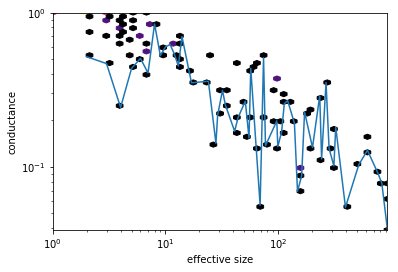

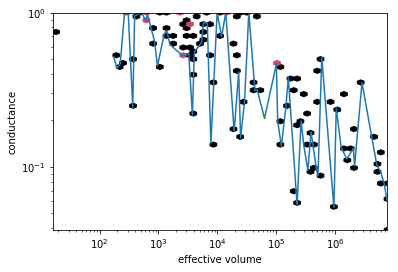

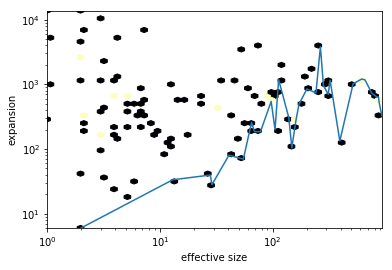

In [16]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "crd")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with MQI

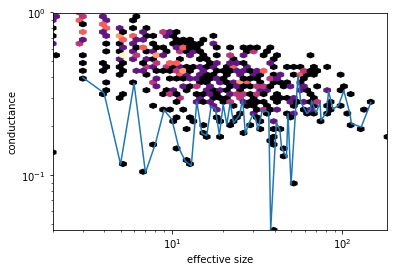

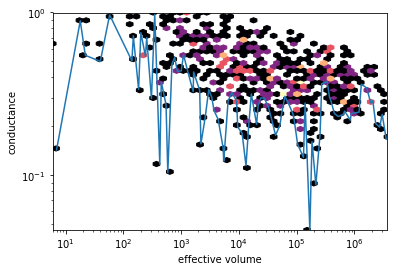

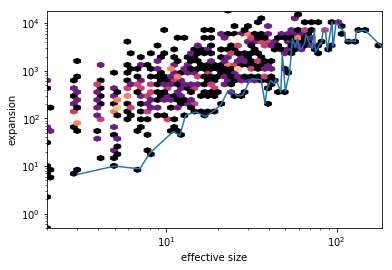

In [17]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "mqi")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with l1reg

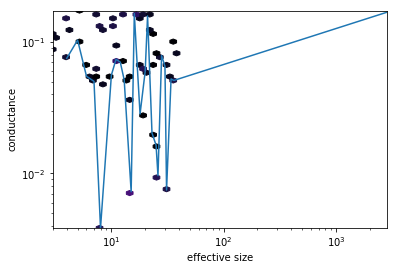

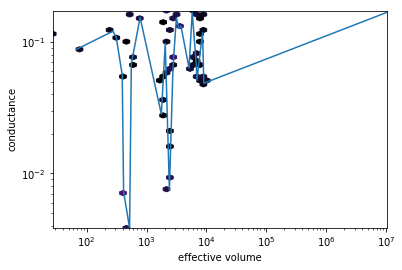

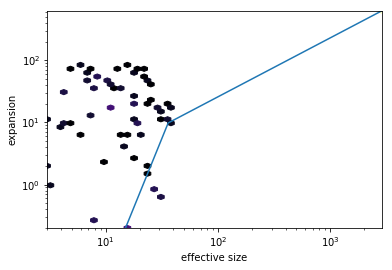

In [18]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "l1reg")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with acl

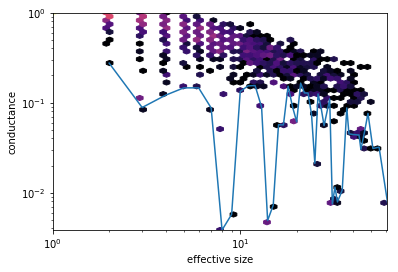

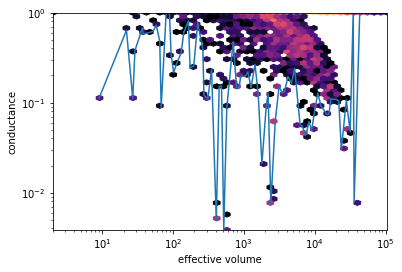

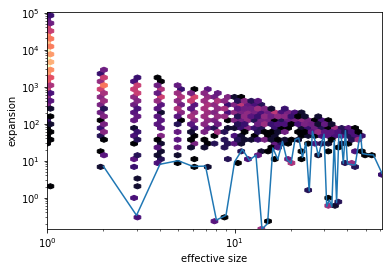

In [19]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "acl")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with selected rows

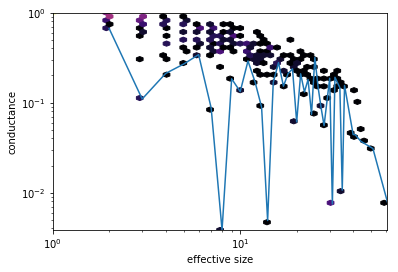

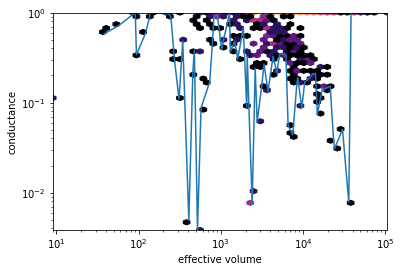

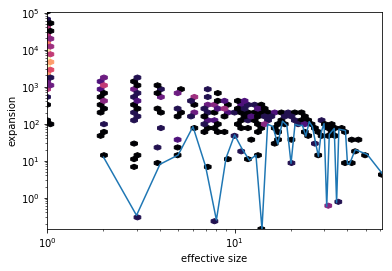

In [20]:
ncp_plots = lgc.NCPPlots(ncp_instance,selected_rows = range(500))
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Extract a specific NCP result

In [21]:
#Get the first ncp result
print(ncp_instance.output_set(0))

[3194]


/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/spectral_clustering.py:91: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/homes/liu1740/.local/lib/python3.6/site-packages/localgraphclustering/approximate_PageRank.py:110: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.



## Clustering metrics for vertex neighborhood

In [22]:
g = lgc.GraphLocal(os.path.join(data_path,'datasets/dolphins.smat'),separator = ' ')
help(lgc.triangleclusters)
cond,cut,vol,cc,t = lgc.triangleclusters(g)

Help on function triangleclusters in module localgraphclustering.triangleclusters:

triangleclusters(G)
    TRIANGLECLUSTERS Clustering metrics for clusters of vertex neighborhoods.
    This function studies clusters which are given by vertex neighborhoods.
    Let v be a vertex in a graph, then the cluster associated with v is just
    the set of all neighbors of v and v itself.  We return the clustering
    metrics associated with these clusters for all vertices in the graph.
    
    Parameters
    ----------
    
    G: GraphLocal
    
    Returns
    -------
    
    cond: Sequence[float]
        conductance of each cluster of a vertex neighborhood
    
    cut: Sequence[float]
        cut of each cluster
    
    vol: Sequence[float]
        volume of each cluster
    
    cc: Sequence[float]
        clustering coefficient of each vertex
    
    t: Sequence[float]
        number of triangles centered at each vertex



## Find extrema in a graph based on neighborhoods.

In [23]:
help(lgc.neighborhoodmin)
minverts, minvals = lgc.neighborhoodmin(g,cond,True)

Help on function neighborhoodmin in module localgraphclustering.neighborhoodmin:

neighborhoodmin(G, vals, strict)
    Find extrema in a graph based on neighborhoods.
    Parameters
    ----------
    G: GraphLocal
    vals: Sequence[float]
        features of neighborhoods used to compare against each other, i.e. conductance
    strict: bool
        If True, find a set of vertices where vals(i) < vals(j) for all neighbors N(j)
        i.e. local minima in the space of the graph
        If False, find a set of vertices where vals(i) <= vals(j) for all neighbors N(j)
        i.e. local minima in the space of the graph
    Returns
    -------
    minverts: Sequence[int]
        the set of vertices
    minvals: Sequence[float]
        the set of min values

